<a href="https://colab.research.google.com/github/neal-logan/dsba5122-summer2024/blob/main/DSBA_5122%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


General Instruction to follow for the assignment:

1) You can find the dataset for this assignment here: Click to [ViewLinks](https://docs.google.com/document/d/1ldMho8CDPQyL7dG_4daZePt6_yPpWoRyRZhs2d6-ogw/edit?usp=sharing) to an external site.

2) Use Python and the Seaborn library to create your visuals.  Paste your code for all graphs into the last question of this Canvas quiz.

3) For every graph, make sure there is a title and axes labels. Title must be centered aligned. Title and Axes labels should be relevant to the data used in the graph.

4) Upload the graphs in either a .png or .jpeg file format only.

5) Based on the visualizations you generate, make sure to answer sub-questions based on the visualizations.


In [8]:
# Environment setup - install Ibis for data manipulation, if necessary
%pip install --upgrade ibis-framework[duckdb]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.2/390.2 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing installation: sqlglot 20.11.0
    Uninstalling sqlglot-20.11.0:
      Successfully uninstalled sqlglot-20.11.0
  Attempting uninstall: ibis-framework
    Found existing installation: ibis-framework 8.0.0
    Uninstalling ibis-framework-8.0.0:
      Successfully uninstalled ibis-framework-8.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires ibis-framework[bigquery]<9.0.0dev,>=8.0.0, but you have ibis-framework 9.0.0 which is incompatible.
bigframes 1.8.0 requires sqlglot<=20.11,>=20.8.0, but you have sqlglot 23.12.2 which is incompatible.


In [9]:
# Environment setup - install Seaborn for visualization, if necessary
%pip install seaborn


In [40]:
#Imports
import ibis
import ibis.selectors as s
from ibis import _
ibis.options.interactive = True

import seaborn as sns
import seaborn.objects as so

import pandas as pd
# import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt



In [14]:
#Mount drive to get data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)





Mounted at /content/drive


In [15]:
# prompt: inspect the data

df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [28]:
#Data import and transformations

#Read in data
df = pd.read_csv('/content/drive/MyDrive/DSBA 5122/Superstore_Sales.csv')

#Convert Order_Date and Ship_Date to datetime format
df['Order_Date_Clean'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date_Clean'] = pd.to_datetime(df['Ship_Date'])

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Date_Clean,Ship_Date_Clean
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08,2016-11-11
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08,2016-11-11
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12,2016-06-16
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11,2015-10-18
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11,2015-10-18


In [17]:
# Question 1
# How many observations(rows) and variables(columns) does the dataset have?

print(df.shape)
print(df.columns)

(9994, 21)
Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [20]:
#Create ibis table

ibis_table = ibis.pandas.connect({"Superstore_Sales": df}).table("Superstore_Sales")

ibis_table.head()

┏━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Row_ID ┃ Order_ID       ┃ Order_Date ┃ Ship_Date  ┃ Ship_Mode      ┃ Customer_ID ┃ Customer_Name   ┃ Segment   ┃ Country       ┃ City            ┃ State      ┃ Postal_Code ┃ Region ┃ Product_ID      ┃ Category        ┃ Sub_Category ┃ Product_Name                                                ┃ Sales    ┃ Quantity ┃ Discount ┃ Profit    ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ string         │ string     │ string     │ string         │ string      │ string          │ string    │ string        │ string          │ string     │ int64       │ string │ string          │ string          │ string       │ string                                                      │ float64  │ int64    │ float64  │ float64   │
├────────┼────────────────┼────────────┼────────────┼────────────────┼─────────────┼─────────────────┼───────────┼───────────────┼─────────────────┼────────────┼─────────────┼────────┼─────────────────┼─────────────────┼──────────────┼─────────────────────────────────────────────────────────────┼──────────┼──────────┼──────────┼───────────┤
│      1 │ CA-2016-152156 │ 11/8/2016  │ 11/11/2016 │ Second Class   │ CG-12520    │ Claire Gute     │ Consumer  │ United States │ Henderson       │ Kentucky   │       42420 │ South  │ FUR-BO-10001798 │ Furniture       │ Bookcases    │ Bush Somerset Collection Bookcase                           │ 261.9600 │        2 │     0.00 │   41.9136 │
│      2 │ CA-2016-152156 │ 11/8/2016  │ 11/11/2016 │ Second Class   │ CG-12520    │ Claire Gute     │ Consumer  │ United States │ Henderson       │ Kentucky   │       42420 │ South  │ FUR-CH-10000454 │ Furniture       │ Chairs       │ Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back │ 731.9400 │        3 │     0.00 │  219.5820 │
│      3 │ CA-2016-138688 │ 6/12/2016  │ 6/16/2016  │ Second Class   │ DV-13045    │ Darrin Van Huff │ Corporate │ United States │ Los Angeles     │ California │       90036 │ West   │ OFF-LA-10000240 │ Office Supplies │ Labels       │ Self-Adhesive Address Labels for Typewriters by Universal   │  14.6200 │        2 │     0.00 │    6.8714 │
│      4 │ US-2015-108966 │ 10/11/2015 │ 10/18/2015 │ Standard Class │ SO-20335    │ Sean O'Donnell  │ Consumer  │ United States │ Fort Lauderdale │ Florida    │       33311 │ South  │ FUR-TA-10000577 │ Furniture       │ Tables       │ Bretford CR4500 Series Slim Rectangular Table               │ 957.5775 │        5 │     0.45 │ -383.0310 │
│      5 │ US-2015-108966 │ 10/11/2015 │ 10/18/2015 │ Standard Class │ SO-20335    │ Sean O'Donnell  │ Consumer  │ United States │ Fort Lauderdale │ Florida    │       33311 │ South  │ OFF-ST-10000760 │ Office Supplies │ Storage      │ Eldon Fold 'N Roll Cart System                              │  22.3680 │        2 │     0.20 │    2.5164 │
└────────┴────────────────┴────────────┴────────────┴────────────────┴─────────────┴─────────────────┴───────────┴───────────────┴─────────────────┴────────────┴─────────────┴────────┴─────────────────┴─────────────────┴──────────────┴─────────────────────────────────────────────────────────────┴──────────┴──────────┴──────────┴───────────┘

In [21]:
#Seaborn setup

sns.set_theme() #From tutorial
sns.set_style("whitegrid") #Suggested by colab ai

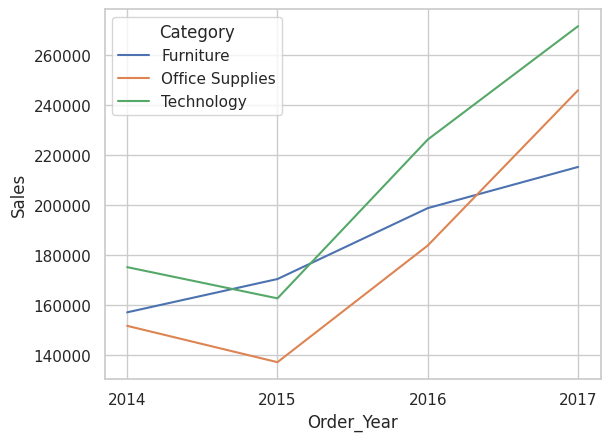

In [49]:
# Question 2 - CHART
# Make a Line graph showing the Category Sales made by the Superstore Year on
# year. Each category has a separate line on the graph. Attach the graph below.

# Hint: Convert Sales variable to numeric data type. Use Order_Date column and
# for the graph show only Order Year on X axis. Hence, summarize data by
# grouping by year.

#Create a column aggregating the year
df['Order_Year'] = df['Order_Date_Clean'].dt.year

#Create a new dataframe aggregating on years
df_years = df.groupby(['Order_Year', 'Category']).agg({'Sales': 'sum'}).reset_index()

df_years['Order_Year'] = df_years['Order_Year'].astype(int)

sns.lineplot(x="Order_Year", y="Sales", hue="Category", data=df_years)

plt.xticks(df_years['Order_Year'].unique())
plt.show()

In [23]:
#Question 3
#Name the 3 distinct product sales categories

df['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

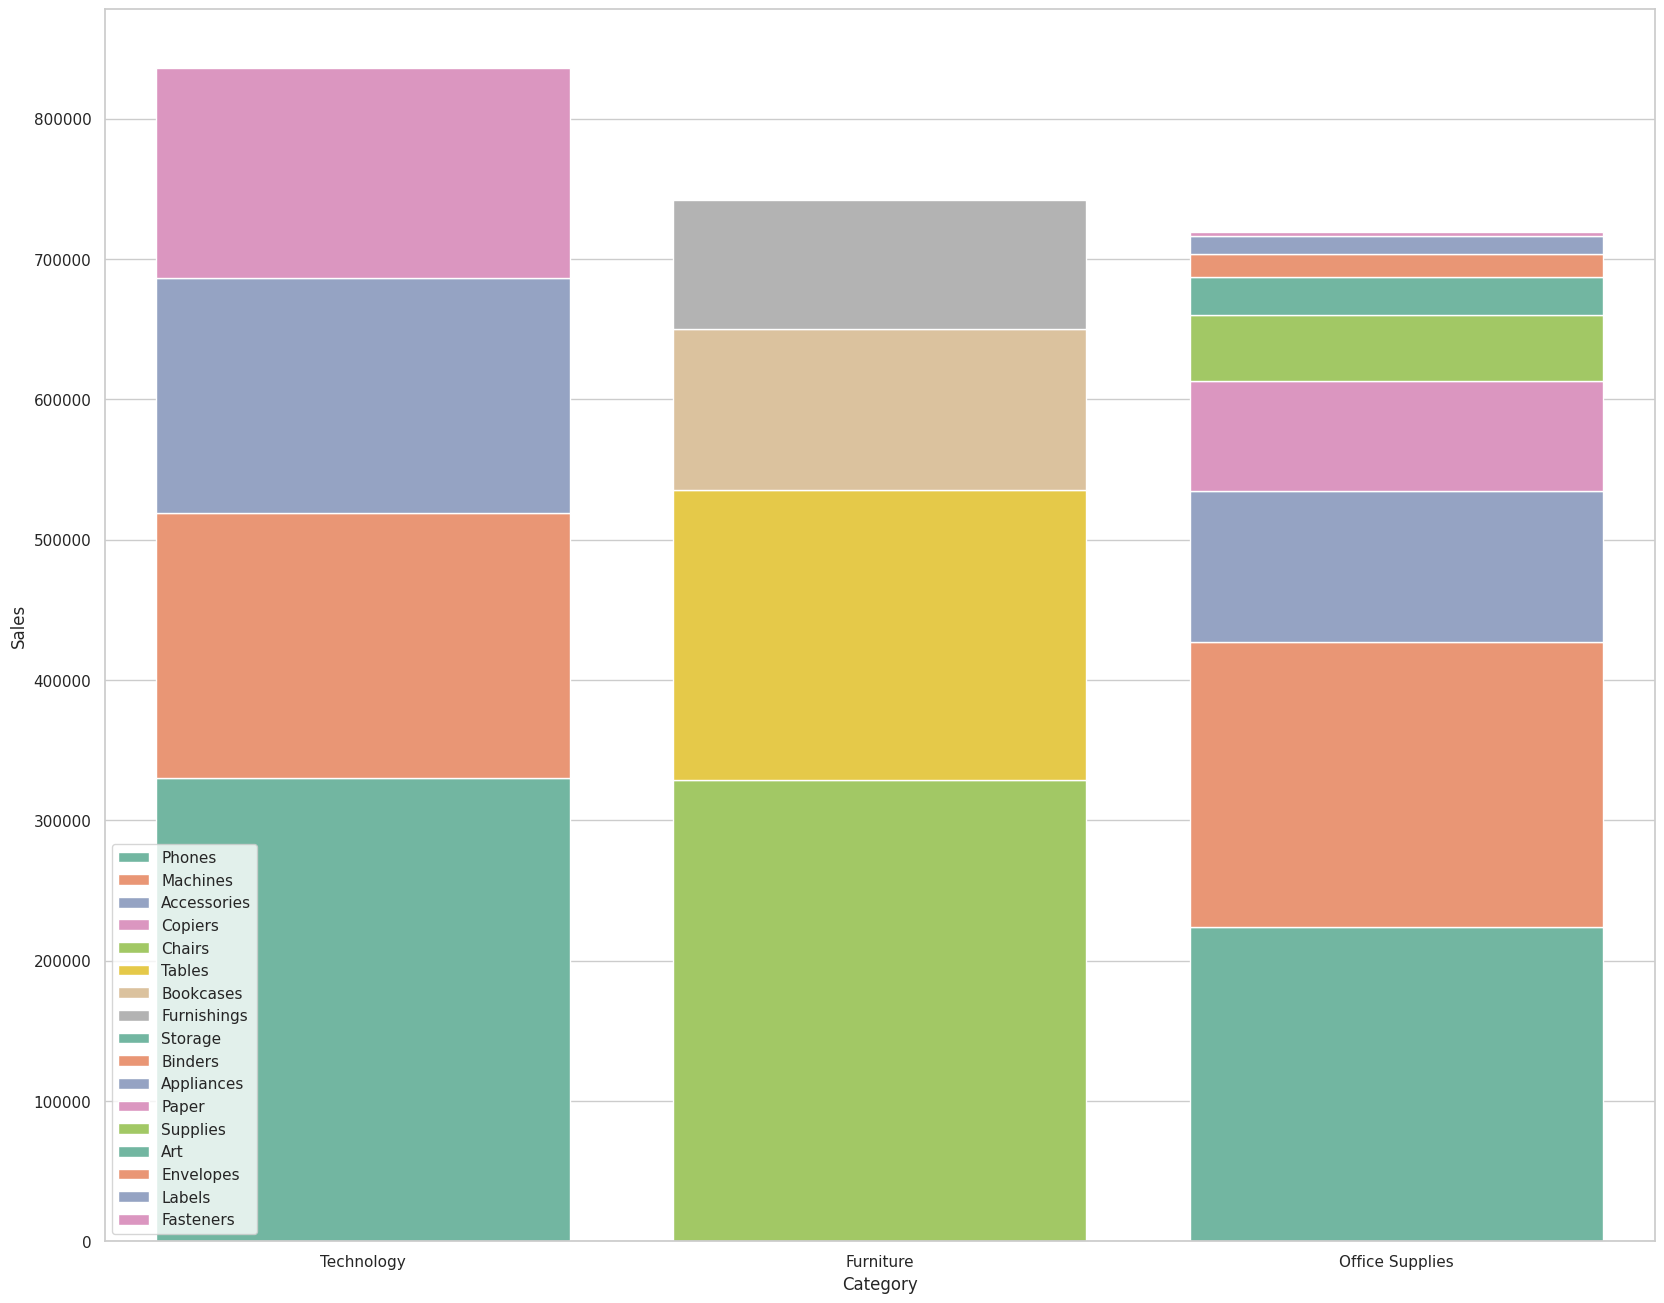

In [135]:
#Question 6 - CHART
# Make a Stacked Bar Graph showing the Sales split in each category. Arrange the
# subcategories in descending order of sales within each category such that
# subcategory with maximum sales is on top of each stack. Label subcategories on
# each bar stack. Attach the graph below.

#Create a new dataframe aggregating on categories and subcategories
df_subcats = df.groupby(['Category', 'Sub_Category']).agg({'Sales': 'sum'}).reset_index()

df_subcats = df_subcats.sort_values(by=['Sales'], ascending=False)


plt.figure(figsize=(20, 16))
ax = plt.gca()

#Set the palette
sns.set_palette(sns.color_palette("Set2", 13))


for cat in df_subcats['Category'].unique():
    bottom = 0
    cat_data = df_subcats[df_subcats['Category'] == cat]

    for subcat in cat_data['Sub_Category'].unique():
        subcat_data = cat_data[cat_data['Sub_Category'] == subcat]
        sns.barplot(x="Category", y="Sales", data=subcat_data, label=subcat, bottom=bottom)

        bottom += subcat_data['Sales'].sum()



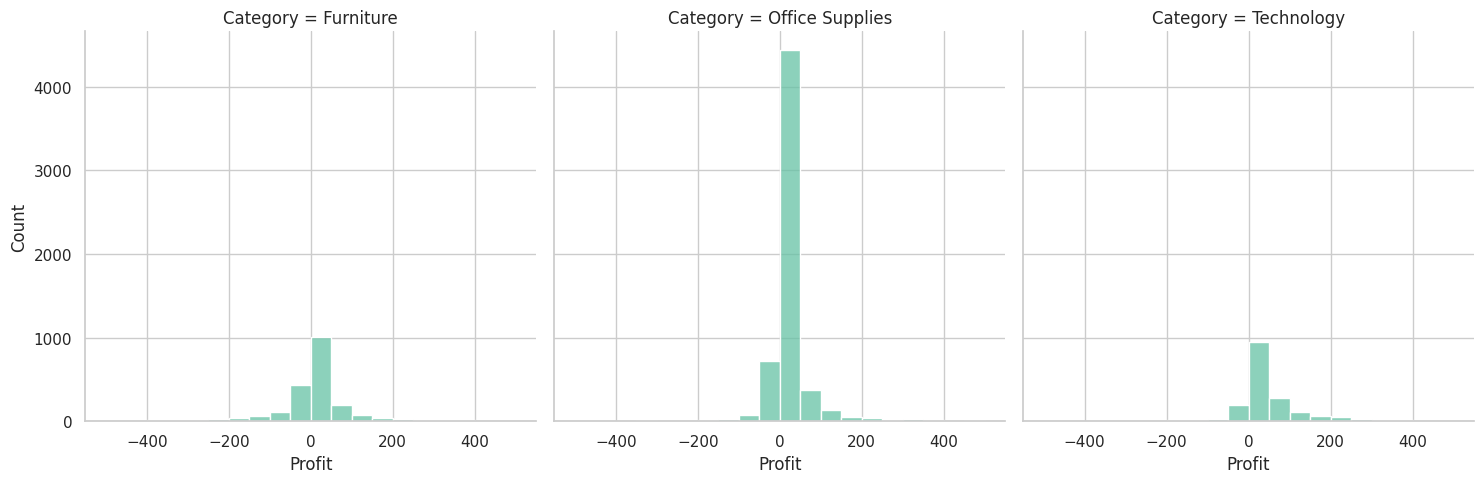

In [115]:
# Question 8 - CHART
# Make a Histogram panel of 3 graphs(3 histograms side by side) for the Profit
# data for each Category. Split the histogram based on the category. For easy
# interpretation, take binwidth = 50 and x axis limits as (-500,500). Attach the
# Graph below.

# Hint: Convert Profit data to numeric datatype.

from seaborn import displot

sns.displot(
    df, x="Profit", col="Category", binwidth=50, binrange=(-500, 500)
)


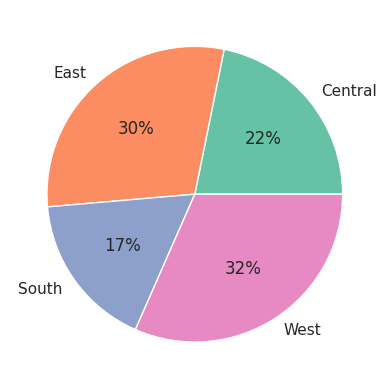

In [123]:
# Question 9 - CHART
# Create a pie-plot to show the total sales in each region. Sales in each
# region should be labelled as a percentage of total sales. Attach the graph
# below.

df_regions = df.groupby('Region')['Sales'].sum()

plt.pie(
    df_regions,
    labels = df_regions.index,
    autopct='%1.0f%%')
plt.show()



<Axes: xlabel='Region'>

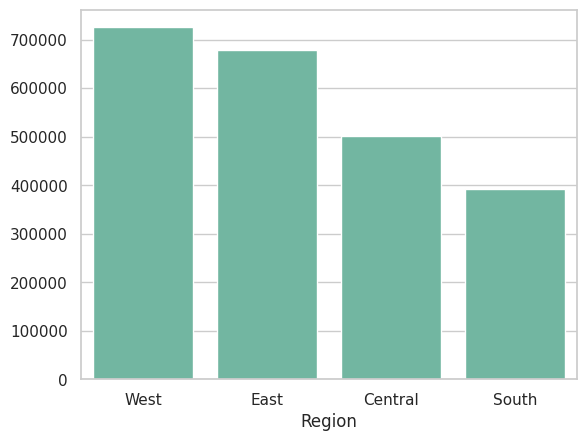

In [126]:
# Question 10 - CHART
# For the same question above, now create a bar graph. Bars should be arranged
# in decreasing order of sales made per region. Attach the graph below.

df_regions = df_regions.sort_values(ascending=False)

sns.barplot(
    x=df_regions.index,
    y=df_regions.values)




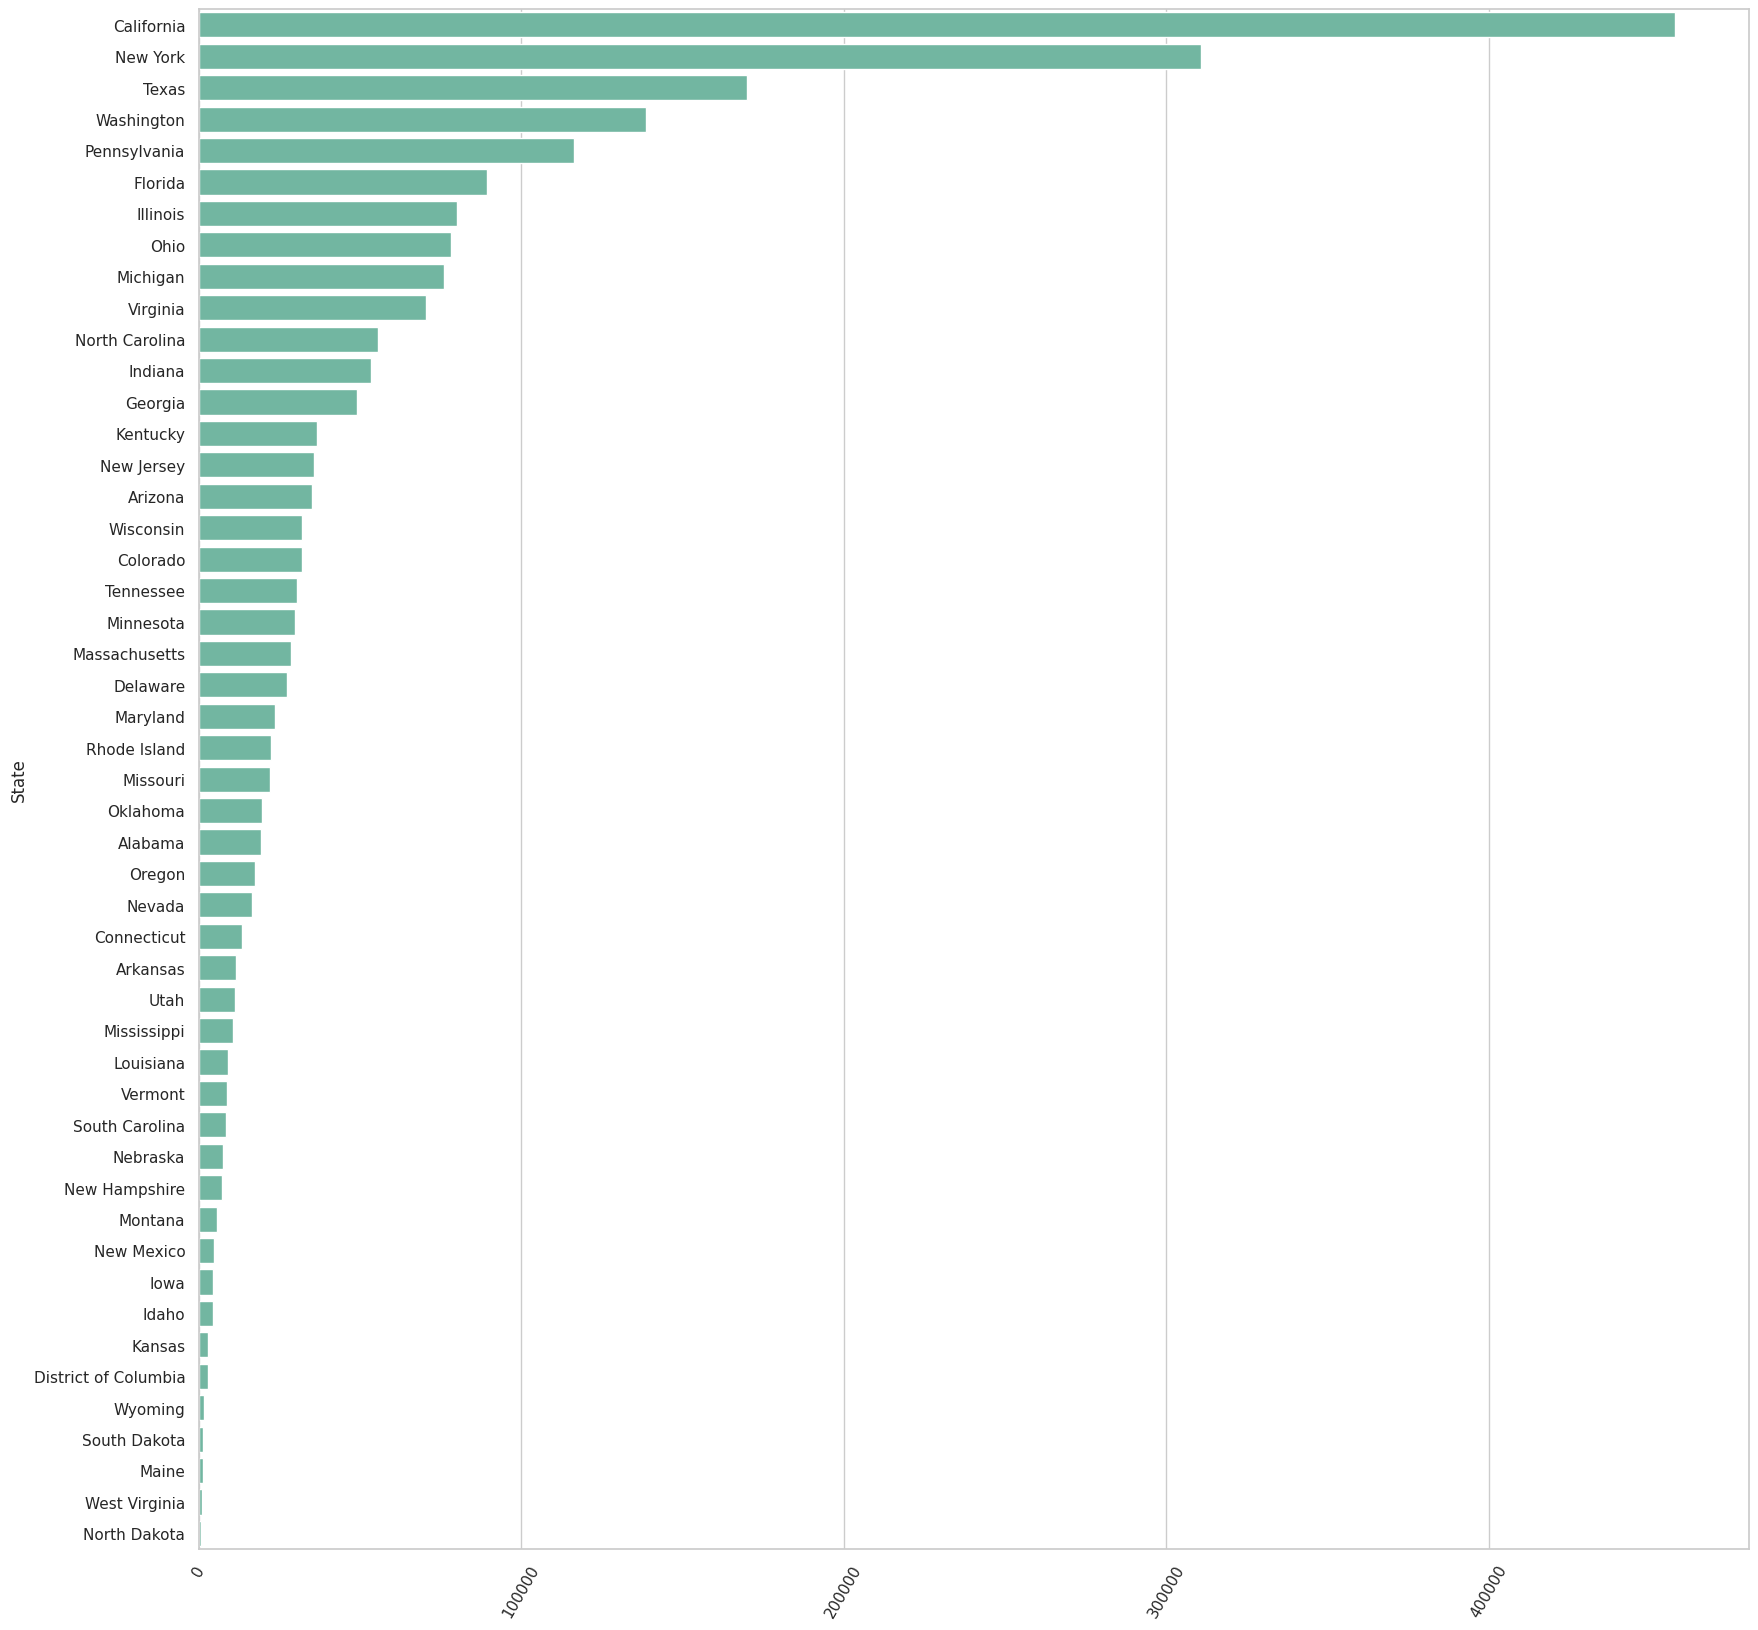

In [134]:
# Question 13 - CHART
# Make a bar graph showing the total sales by state in the US. Make the graph
# readable by changing the State label alignment. Good practice is to arrange
# the States in increasing or decreasing order of Sales, which makes
# interpretation easy and sensible. Attach the Graph below.

plt.figure(figsize=(20, 20))
df_states = df.groupby('State')['Sales'].sum()

df_states = df_states.sort_values(ascending=False)

sns.barplot(
    y=df_states.index,
    x=df_states.values)

plt.xticks(rotation=60)

plt.show()

